## Forehead recognition

In [1]:
import face_recognition
import cv2
import PIL.Image
import PIL.ImageDraw
import os
import matplotlib.pyplot as plt

#image=cv2.imread(img_path)
unknown_image = face_recognition.load_image_file("70years.jpg")
face_locations = face_recognition.face_locations(unknown_image) # detects all the faces in image
t = len(face_locations)


print(len(face_locations))
print(face_locations)


face_landmarks_list = face_recognition.face_landmarks(unknown_image)
# Drawing rectangles over the faces
pil_image = PIL.Image.fromarray(unknown_image)
for face_location in face_locations:
    #print(face_location)
    top,right,bottom,left =face_location
    draw_shape = PIL.ImageDraw.Draw(pil_image)
    im = PIL.Image.open("70years.jpg")
    #bottom=34
    k = face_landmarks_list[0]['right_eyebrow']
    bottom= face_landmarks_list[0]['right_eyebrow'][0][1]
    for k1 in k :   
        if(bottom>k1[1]):
            bottom=k1[1]
    k = face_landmarks_list[0]['left_eyebrow']
    lbottom= face_landmarks_list[0]['left_eyebrow'][0][1]
    for k1 in k :   
        if(lbottom>k1[1]):
            lbottom=k1[1]
    bottom=min(bottom,lbottom)
    print(bottom)
    im = im.crop((left, top, right, bottom))
    #im.save("wrinkled23.jpg")    
    draw_shape.rectangle([left, top, right, bottom],outline="blue")

1
[(24, 253, 153, 124)]
59


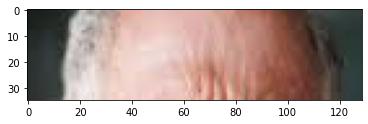

In [2]:
plt.imshow(im)
plt.show()

iimage = cv2.imread('m2.jpg')
plt.imshow(iimage)
plt.show()

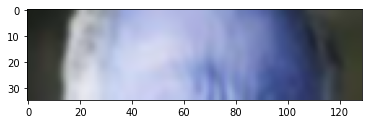

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#image = cv2.imread('m5.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.cvtColor(np.float32(im)/255.0, cv2.COLOR_BGR2RGB)
image = cv2.GaussianBlur(image,(5,5),0)

plt.imshow(image)
plt.show()

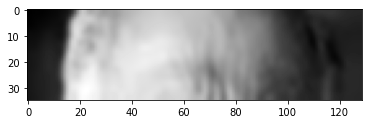

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(image_gray,  cmap='gray')
plt.show()

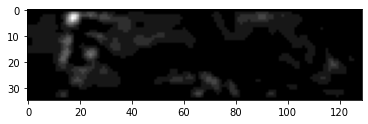

In [5]:
sobely = cv2.Sobel(image_gray, cv2.CV_8UC1, 0, 1, ksize=5)

plt.imshow(sobely,  cmap='gray')
plt.show()

In [6]:
height, width= sobely.shape
param_1 = cv2.sumElems(sobely)[0]/(height * width)
param_1

0.49656699889258027

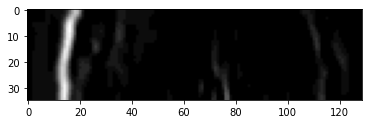

In [7]:
sobelx = cv2.Sobel(image_gray, cv2.CV_8UC1, 1, 0, ksize=5)

plt.imshow(sobelx,  cmap='gray')
plt.show()

In [8]:
height, width= sobelx.shape
param_2 = cv2.sumElems(sobelx)[0]/(height * width)
param_2

0.9049833887043189

In [9]:
param_3 = param_1/param_2

In [10]:
import math
def hitung_peluang(value, mean, deviasi):
    n = math.exp(-0.5 * np.power(( value - mean) / deviasi, 2)) / math.sqrt(2 * 3.14 * np.power(deviasi,2))
    return n

In [11]:
# param1_mean1 = 88.2840072262
# param2_mean1 = 59.3175663521
# param3_mean1 = 1.57953378876

param1_mean1 = 78.40009811865033
param2_mean1 = 75.75209345453581
param3_mean1 = 1.1045875851917588

param1_std1 = 22.561402808736936
param2_std1 = 22.429842106349696
param3_std1 = 0.3855696857695436

# param1_mean2 = 50.8260584039
# param2_mean2 = 54.9008517827
# param3_mean2 = 0.876938963721

param1_mean2 = 105.29509829463382
param2_mean2 = 69.04203306351434
param3_mean2 = 1.6381583126052792

param1_std2 = 38.58687554314048
param2_std2 = 26.438846803722548
param3_std2 = 0.6865329340928746

p1 = hitung_peluang(param_1, param1_mean1, param1_std1)
p2 = hitung_peluang(param_2, param2_mean1, param2_std1)
p3 = hitung_peluang(param_3, param3_mean1, param3_std1)
total = round((0.5 * p1 * p2 * p3 * 10**10),4)     #changes apply
print (p1, p2, p3, total)

4.556465947904056e-05 6.795448575855506e-05 0.36606868146778165 5.6673


In [12]:
p1_2 = hitung_peluang(param_1, param1_mean2, param1_std2)
p2_2 = hitung_peluang(param_2, param2_mean2, param2_std2)
p3_2 = hitung_peluang(param_3, param3_mean2, param3_std2)
total_2 = round(( 0.5 * p1_2 * p2_2 * p3_2 * 10**10),4)   #changes apply
print (p1_2, p2_2, p3_2, total_2)

0.0002587406653097537 0.000545183801286946 0.16501792269574397 116.3881


In [13]:
if total > total_2:
    print ("wrinkles")
else:
    print ("unwrinkles")

unwrinkles
